#### 1) 
__Code SIRPLOT (page 69) and make sure you can modify it to make “smooth” functions.__

In [1]:
# Libs
import matplotlib.pyplot as plt
import numpy as np

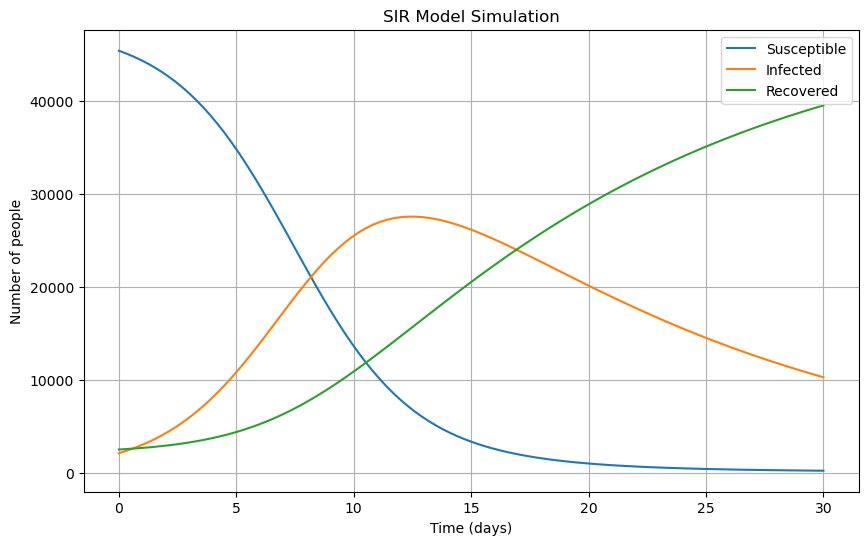

Final values: t=30.00, S=215.82, I=10269.78, R=39514.40


In [2]:
t_data, S_data, I_data, R_data = [], [], [], []

tinitial, tfinal = 0, 30
numberofsteps = 100
S, I, R = 45400, 2100, 2500
a, b = 0.00001, 1/14

deltat = (tfinal - tinitial) / numberofsteps

for _ in range(numberofsteps + 1):
    t_data.append(tinitial)
    S_data.append(S)
    I_data.append(I)
    R_data.append(R)
    
    Sprime = -a * S * I
    Iprime = a * S * I - b * I
    Rprime = b * I
    
    S += Sprime * deltat
    I += Iprime * deltat
    R += Rprime * deltat
    tinitial += deltat

plt.figure(figsize=(10, 6))
plt.plot(t_data, S_data, label='Susceptible')
plt.plot(t_data, I_data, label='Infected')
plt.plot(t_data, R_data, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of people')
plt.title('SIR Model Simulation')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final values: t={t_data[-1]:.2f}, S={S_data[-1]:.2f}, I={I_data[-1]:.2f}, R={R_data[-1]:.2f}")

#### 2)
__How small do the timesteps need to be to make the functions S, I, and R smooth?__

I think the number of timesteps needed for smoothness in the S I R functions is related to the total time steps in the time period period we're modeling. If we increase the time period, we generally need to increase the number of steps proportionally to maintain the same level of smoothness. For example, if we double the time period to t = 60, we might need to double the numberofsteps = 100. My rough approximation is that the S I R graph achieves smoothness when numberofsteps = 12 and t = 30.

__How does this relate to the length of time we want to look at? Will the graphs we create for the following questions be identical if we use different timesteps?__

The graphs created with different timesteps won't be identical, but I beleive they should converge as we use smaller timesteps. Larger timesteps will produce more angular graphs which look like linear lines, while smaller timesteps will result in smoother and accurate representations of the SIR model (altough if we "zoomed" in on the graph we would still see these linear lines no matter how large the timestep was).


#### 3) 
#### APLOT

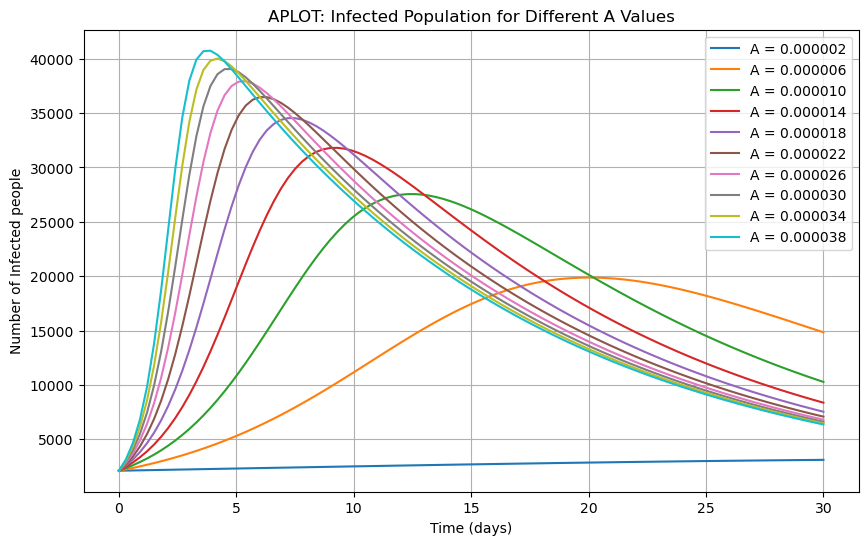

In [3]:
A_values = np.arange(0.000002, 0.000042, 0.000004)

plt.figure(figsize=(10, 6))

for a in A_values:
    t_data, I_data = [], []
    tinitial, tfinal = 0, 30
    numberofsteps = 100
    S, I, R = 45400, 2100, 2500
    b = 1/14
    deltat = (tfinal - tinitial) / numberofsteps
    
    for _ in range(numberofsteps + 1):
        t_data.append(tinitial)
        I_data.append(I)
        
        Sprime = -a * S * I
        Iprime = a * S * I - b * I
        Rprime = b * I
        
        S += Sprime * deltat
        I += Iprime * deltat
        R += Rprime * deltat
        tinitial += deltat
    
    plt.plot(t_data, I_data, label=f'A = {a:.6f}')

plt.xlabel('Time (days)')
plt.ylabel('Number of Infected people')
plt.title('APLOT: Infected Population for Different A Values')
plt.legend()
plt.grid(True)
plt.show()

__What effect does A have on the curve of currently Infected ? How does A affect when the illness peaks?__

As A, the transmission coefficient, increases the maximum height of the infected curve increases. The bright blue line (A = 0.000038) is the largest A, the most transmissible., has the highest peak. Additionally, when A is a higher value, the infection peak happens earlier relative to t. For example, the orange line (A = 0.000005) peaks around day 20, while the blue line previously discussed peaks around day 3 - 4. 

__How does A effect the Total number of infected people by the end of the epidemic, to see this you will need to plot the total recovered (why ?).__

Higher A values lead to more total infections by the end of the epidemic. By plotting the recovered (R), you can see that R accumulates all the past infected population. The final R value equals the total infections throughout the epidemic. 

#### LPLOT

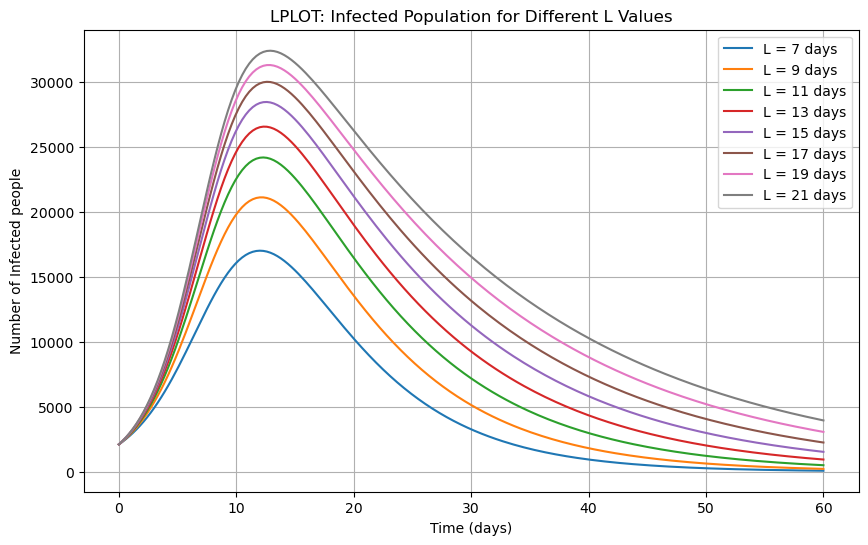

In [4]:
L_values = range(7, 22, 2)
plt.figure(figsize=(10, 6))

for L in L_values:
    t_data, I_data = [], []
    tinitial, tfinal = 0, 60
    numberofsteps = 200
    S, I, R = 45400, 2100, 2500
    a, b = 0.00001, 1/L
    deltat = (tfinal - tinitial) / numberofsteps
    
    for _ in range(numberofsteps + 1):
        t_data.append(tinitial)
        I_data.append(I)
        
        Sprime = -a * S * I
        Iprime = a * S * I - b * I
        Rprime = b * I
        
        S += Sprime * deltat
        I += Iprime * deltat
        R += Rprime * deltat
        tinitial += deltat
    
    plt.plot(t_data, I_data, label=f'L = {L} days')

plt.xlabel('Time (days)')
plt.ylabel('Number of Infected people')
plt.title('LPLOT: Infected Population for Different L Values')
plt.legend()
plt.grid(True)
plt.show()

__How does L affect the curve of currently Infected? How does changing B affect the curve?__

The effect of increasing L, which is mathematically equivalent to decreasing B, causes higher infection peaks, slightly delayed peak timings, and slower decays after the peak. Increasing B (1 / L) has the opposite effect of lowering the peaks and creating a faster decay after the peak. This intuitevly makes sense because if someone is sick for longer the disease will spread more due to the carrier being able to transmit it longer. 

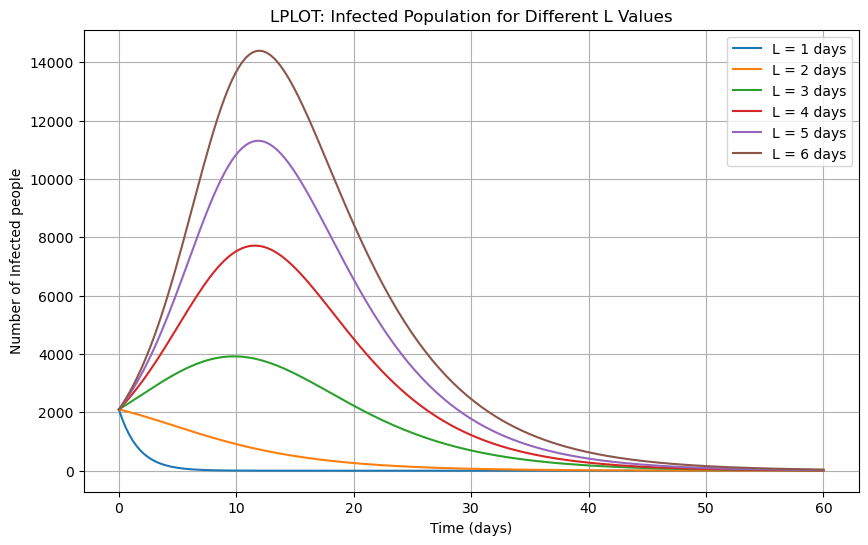

In [5]:
# L ranges from 1 to 6 in steps of 1 days
L_values = range(1, 7, 1)
plt.figure(figsize=(10, 6))

for L in L_values:
    t_data, I_data = [], []
    tinitial, tfinal = 0, 60
    numberofsteps = 200
    S, I, R = 45400, 2100, 2500
    a, b = 0.00001, 1/L
    deltat = (tfinal - tinitial) / numberofsteps
    
    for _ in range(numberofsteps + 1):
        t_data.append(tinitial)
        I_data.append(I)
        
        Sprime = -a * S * I
        Iprime = a * S * I - b * I
        Rprime = b * I
        
        S += Sprime * deltat
        I += Iprime * deltat
        R += Rprime * deltat
        tinitial += deltat
    
    plt.plot(t_data, I_data, label=f'L = {L} days')

plt.xlabel('Time (days)')
plt.ylabel('Number of Infected people')
plt.title('LPLOT: Infected Population for Different L Values')
plt.legend()
plt.grid(True)
plt.show()

__Compare curves of currently Infected using L=1 to L= 6. Why is there such a big difference? Modify LPLOT to show a series of curves between L= 1, L=6. Exactly where is the big change? How many S would you expect at this point? What do we call this concept ?__

The big difference is that for L = 1, the epidemic almost immediately dies out. For L = 6, it spreads peaking around +14,000 people. The big change seems to occur when L = 4, there is a large jump in the number of infected people when L = 4 as compared to L = 3. When the peak happens, you would expect the susceptible to halve in size because this is the inflection point of I. I'm not sure what this concept is called but I think about it as some sort of threshold. If the L >= 2 the infections spreads, if L<= 2 the infection does not spread. 

__How does L effect the Total infected by the end of the epidemic? (You will need to plot the Recovered again, or can you think of another way to get the info ?)__

First, the final R value will represent the total number infected. Thus, a higher R indicates a more infective virus (i.e., L value is higher). I don't think you need to graph this, you could simply just look at the Total I = S - final S. This would show you that the lower final S value indicates more total infections. 

__Modify your regular SIRPLOT so that you can easily change L and A.__

Already modified so L and A (b and a in my model, respectively) can be easily changed.

__Make a model of an epidemic that peaks soon with many infected. What A, L did you use? Make an epidemic that peaks later with many infected. (A,L?) Make an epidemic that peaks soon with few infected. Make an epidemic that peaks later with few infected.__

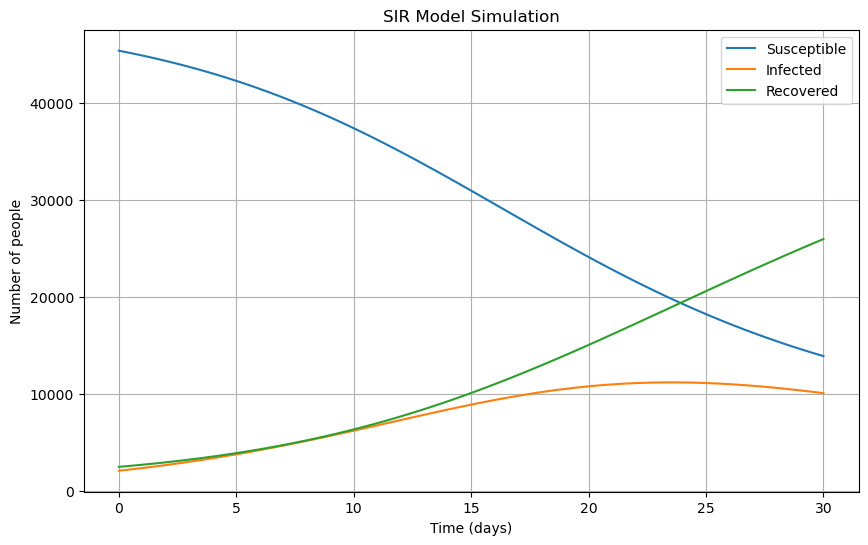

Final values: t=30.00, S=13918.08, I=10097.03, R=25984.89


In [6]:
t_data, S_data, I_data, R_data = [], [], [], []

tinitial, tfinal = 0, 30
numberofsteps = 100
S, I, R = 45400, 2100, 2500
a, b = 0.000005, 1/10

deltat = (tfinal - tinitial) / numberofsteps

for _ in range(numberofsteps + 1):
    t_data.append(tinitial)
    S_data.append(S)
    I_data.append(I)
    R_data.append(R)
    
    Sprime = -a * S * I
    Iprime = a * S * I - b * I
    Rprime = b * I
    
    S += Sprime * deltat
    I += Iprime * deltat
    R += Rprime * deltat
    tinitial += deltat

plt.figure(figsize=(10, 6))
plt.plot(t_data, S_data, label='Susceptible')
plt.plot(t_data, I_data, label='Infected')
plt.plot(t_data, R_data, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of people')
plt.title('SIR Model Simulation')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final values: t={t_data[-1]:.2f}, S={S_data[-1]:.2f}, I={I_data[-1]:.2f}, R={R_data[-1]:.2f}")

To get a late peak with many infected I used a moderate A and a long L. I tried a number of values but landed on A = 0.000009 and L = 30. To make a epidemic that peaks soon with few infected I would use A = 0.00004 and L = 5. To make an epidemic peak later with few infected I would use A = 0.000005 and L = 10.

__How do A and L affect the threshold value ? How does B affect the threshold value?__

Increasing A or L lowers the threshold value and makes it easier for a pandemic to spread. B, which is 1/L, shortens the illness duration and raises the threshold effectively making it harder for the pandemic to spread. 

__How would you modify SIRPLOT to show the total new infected per day, rather than the total infected per day? How would you modify it to show the Total infected since day 0.__

In order to modify SIRPLOT to show the new infected per day, I would modify my model to calculate the daily change in I + R and create an iteration of the loop that would store the previous days I + R value, calculate the current days value, and subtract from the previous days to get the new value. This should get you what you need.

In order to get the Total infected since day 0 I would simply get the cumulative sum of R+I and plot R+I instead of just I. 

#### 4)
#### Case Study:

Measles Panic?

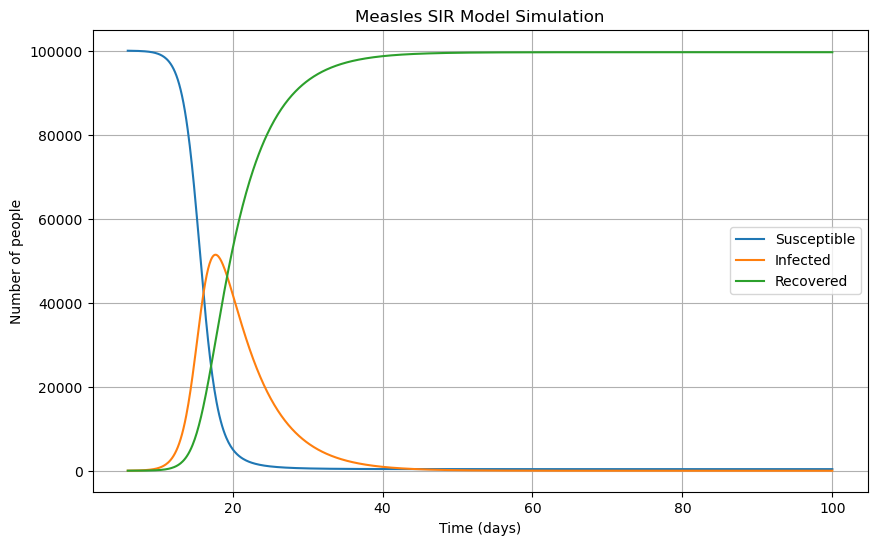

In [7]:
t_data, S_data, I_data, R_data = [], [], [], []

tinitial, tfinal = 6, 100
numberofsteps = 1000
n = 100000
S, I, R = 99975, 19, 6
a, b = 0.000011, 1/5

deltat = (tfinal - tinitial) / numberofsteps

for _ in range(numberofsteps + 1):
    t_data.append(tinitial)
    S_data.append(S)
    I_data.append(I)
    R_data.append(R)
    
    Sprime = -a * S * I
    Iprime = a * S * I - b * I
    Rprime = b * I
    
    S += Sprime * deltat
    I += Iprime * deltat
    R += Rprime * deltat
    tinitial += deltat

plt.figure(figsize=(10, 6))
plt.plot(t_data, S_data, label='Susceptible')
plt.plot(t_data, I_data, label='Infected')
plt.plot(t_data, R_data, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of people')
plt.title('Measles SIR Model Simulation')
plt.legend()
plt.grid(True)
plt.show()


- Total population: N = 100,000
- Duration of illness: 5 days, so recovery rate b = 1/5 = 0.2
- Initial conditions on day 6: I(6) = 19, R(6) = 6
- Calculate S(6) = N - I(6) - R(6) = 100,000 - 19 - 6 = 99,975

I estimate a using data from day 5 and 6:
- I(5) = 10, I(6) = 19
- ΔI = 19 - 10 = 9
- I' ≈ 9 (new infections in one day)
- I' = aSI - bI
- 9 = a(99,981)(10) - 0.2(10)
- 9 = 999,810a - 2
- 999,810a = 11
- a ≈ 0.000011

1. __Is the mayor right?__ No, the mayor is incorrect. The epidemic will be a significant problem based on my model.
2. __When will the epidemic peak?__ The epidemic peaks before day 20. Close to 50,000 people are infected on that day.
3. __How many will get ill?__ The entire population of 100,000 will have been infected. The S line drops to zero and R line rises to 100,000, indicating the entire population got measles over the ~50 day epidemic.

#### 6)
1.

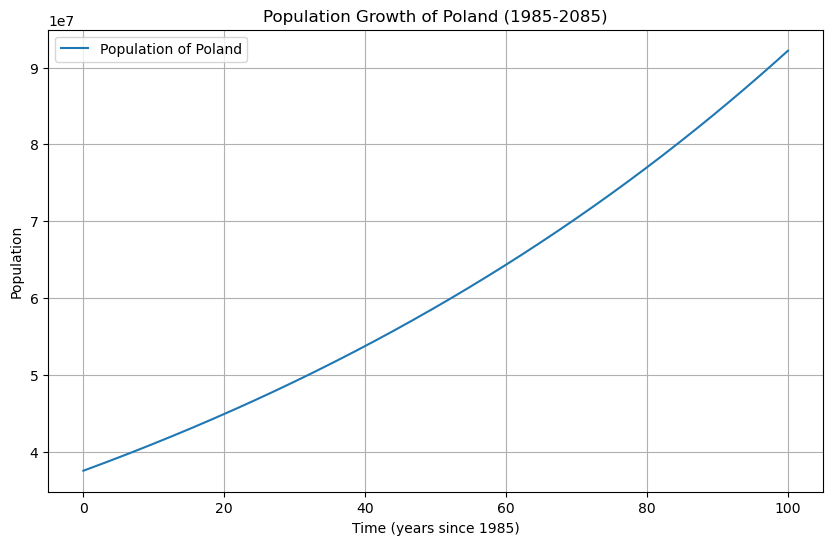

Estimated population in 2085: 92280769.41


In [8]:
t_data, P_data = [], []

tinitial, tfinal = 0, 100
numberofsteps = 1000
P = 37500000
k = 0.009

deltat = (tfinal - tinitial) / numberofsteps

for _ in range(numberofsteps + 1):
    t_data.append(tinitial)
    P_data.append(P)
    
    Pprime = k * P
    
    P += Pprime * deltat
    tinitial += deltat

plt.figure(figsize=(10, 6))
plt.plot(t_data, P_data, label='Population of Poland')
plt.xlabel('Time (years since 1985)')
plt.ylabel('Population')
plt.title('Population Growth of Poland (1985-2085)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estimated population in 2085: {P:.2f}")

2.

In [9]:
t_initial = 0
t_final = 37
y = 100
number_of_steps = 10000
delta_t = (t_final - t_initial) / number_of_steps

for _ in range(number_of_steps):
    y_prime = 0.1 * y * (1 - y / 1000)
    
    delta_y = y_prime * delta_t
    y += delta_y
    t_initial += delta_t

print(f"Estimated value of y(37): {y:.2f}")

Estimated value of y(37): 817.97


3.

__A) Referring to the graph of y(t) obtained in the text on page 82, what can you say about the behavior of y as t gets large?__

As t increases, y(t) approaches the carrying capacity of the system (i.e., 1,000). The graph peaks off around 1,000. 

__B) Suppose we had started with y(0) = 1000. How would the population have changed over time? Why?__

y(0) = 1000 is already the carrying capacity, so there would be no population change over time. 

__C) Suppose we had started with y(0) = 1500. How would the population have changed over time? Why?__

If we started with y(0) = 1,500, I would expect the final population would reduce to 1,000 because y' would be negative. 

__D) Suppose we had started with y(0) = 0. How would the population have changed over time? Why?__

There would be no change over time because y' = 0, or in the physical world, there would be no rabbits to begin with. 

__E) The number 1000 in the denominator of the rate equation is called the carrying capacity of the system. Can you give a physical interpretation for this number?__

The carrying capacity in a system is the maximum number of X that the X system can support indefinitely. In the case of the rabbits its likely based on avaialble food, shelter, and preditors. 

4.

In general, the expected graph will show the population growth curves for different carrying capacities. As the carrying capacity increases, the population will grow more before leveling off.

A general rule could be as carrying capacity increases, the population will stabalize at a higher level. 

5. 

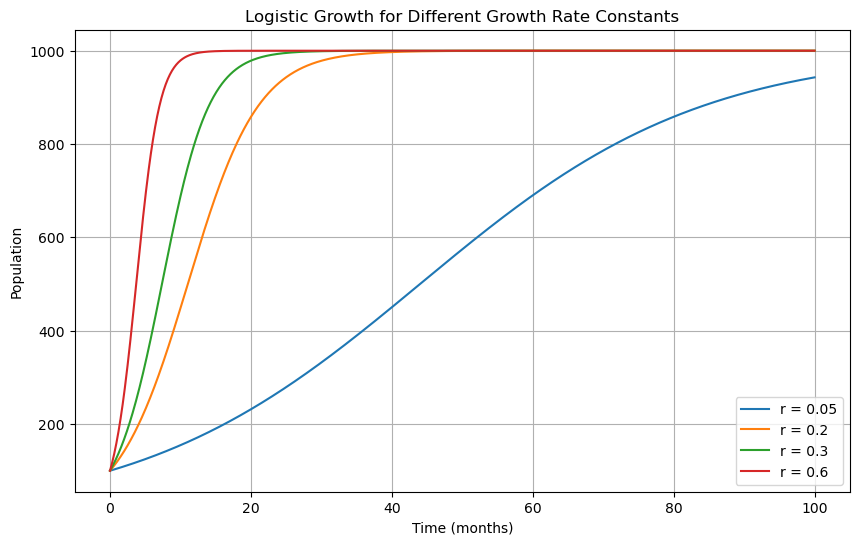

In [10]:
def logistic_growth_with_constant(r, t_final, number_of_steps):
    y = 100
    t_initial = 0
    delta_t = (t_final - t_initial) / number_of_steps
    
    t_data, y_data = [], []
    
    for _ in range(number_of_steps + 1):
        t_data.append(t_initial)
        y_data.append(y)
        
        y_prime = r * y * (1 - y / 1000)
        
        delta_y = y_prime * delta_t
        y += delta_y
        t_initial += delta_t
    
    return t_data, y_data

t_final = 100
number_of_steps = 1000

growth_constants = [0.05, 0.2, 0.3, 0.6]

plt.figure(figsize=(10, 6))
for r in growth_constants:
    t_data, y_data = logistic_growth_with_constant(r, t_final, number_of_steps)
    plt.plot(t_data, y_data, label=f'r = {r}')

plt.xlabel('Time (months)')
plt.ylabel('Population')
plt.title('Logistic Growth for Different Growth Rate Constants')
plt.legend()
plt.grid(True)
plt.show()

6. 

t = 44 gets you close to y(t) = 900

In [11]:

t_initial = 0
t_final = 44
y = 100
number_of_steps = 10000
delta_t = (t_final - t_initial) / number_of_steps


for _ in range(number_of_steps):
    y_prime = 0.1 * y * (1 - y / 1000)
    
    delta_y = y_prime * delta_t
    y += delta_y
    t_initial += delta_t

print(f"Estimated value of y(44): {y:.2f}")

Estimated value of y(44): 900.50


7. 

If you replace 0.1 with 0.22 you will get ~ y(20) = 900.50

In [12]:
t_initial = 0
t_final = 20
y = 100
number_of_steps = 10000
delta_t = (t_final - t_initial) / number_of_steps

for _ in range(number_of_steps):
    y_prime = 0.22 * y * (1 - y / 1000)
    
    delta_y = y_prime * delta_t
    y += delta_y
    t_initial += delta_t

print(f"Estimated value of y(20): {y:.2f}")

Estimated value of y(20): 900.50


#### 7)
__Read 2.3 and use write the code for LENGTH in python (share in Piazza if you have a good solution). page 91__

In [13]:
def f(x):
    return x * x

start = 0
end = 1
steps = 2

step_size = (end - start) / steps
total_length = 0

for i in range(steps):
    x1 = start + i * step_size
    x2 = x1 + step_size
    y1 = f(x1)
    y2 = f(x2)
    
    segment_length = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
    total_length += segment_length
    
    print(f"Segment {i+1} length: {segment_length}")

print(f"Total length: {total_length}")

Segment 1 length: 0.5590169943749475
Segment 2 length: 0.9013878188659973
Total length: 1.4604048132409448


#### 8)

__By using a computer to graph y= x^2 − 2^x, find the solutions of the equation x^2 = 2^x to four decimal place accuracy.__

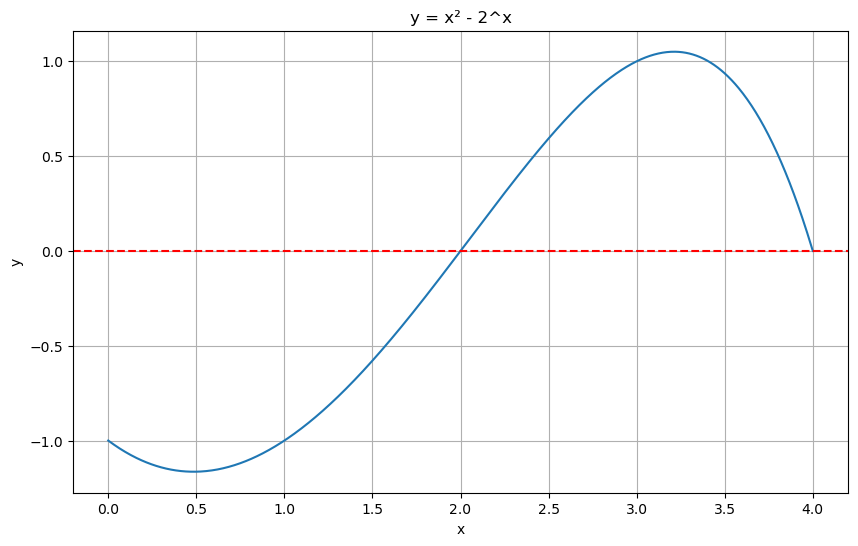

In [14]:
def f(x):
    return x**2 - 2**x

x = np.linspace(0, 4, 1000)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x² - 2^x')
plt.grid(True)
plt.show()

__2. Run the program LENGTH to verify that it gives the lengths of the individual segments and their total length.__

In [15]:
def f(x):
    return x * x

start = 0
end = 1
steps = 2

step_size = (end - start) / steps
total_length = 0

for _ in range(steps):
    x1 = start + i * step_size
    x2 = x1 + step_size
    y1 = f(x1)
    y2 = f(x2)
    
    segment_length = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
    total_length += segment_length
    
    print(f"Segment {i+1} length: {segment_length}")

print(f"Total length: {total_length}")

Segment 2 length: 0.9013878188659973
Segment 2 length: 0.9013878188659973
Total length: 1.8027756377319946


__3. What line in the program gives the instruction to work with the function f(x) = x^2? What line indicates the number of segments to be measured?__

This is the line that gives the instruction to work with the function f(x) = x^2:

```python
    def f(x):
        return x * x
```

The line that indicates the number of segments to be measured is: 

```python
    steps = 2
```

__4. Each segment has a left and a right endpoint. What lines in the program designate the x- and y-coordinates of the left endpoint; the right endpoint?__

The lines that designate the x and y coordinates of the left endpoints are: 

```python
x1 = start + i * step_size
y1 = f(x1)
```

The lines that designate the x and y coordinates of the right endpoints are: 

```python
x2 = x1 + step_size
y2 = f(x2)
```

__5. Where in the program is the length of the k-th segment calculated? The segment is treated as the hypotenuse of a triangle whose length is measured by the Pythagorean theorem. How is the base of that triangle denoted in the program? How is the altitude of that triangle denoted?__

The length of the k-th segment is calculated by: 

```python
segment_length = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
```

The base of the triangle is denoted by: 

```python
(x2 - x1)
```

The altitude of the triangle is denoted by: 

```python
(y2 - y1)
```

In [16]:
def f(x):
    return x * x

start = 0
end = 1
steps = 20
step_size = (end - start) / steps
total_length = 0

for i in range(steps):
    x1 = start + i * step_size
    x2 = x1 + step_size
    y1 = f(x1)
    y2 = f(x2)
    
    segment_length = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
    total_length += segment_length

print(f"Number of segments: {steps}")
print(f"Estimated length of parabola: {total_length}")

Number of segments: 20
Estimated length of parabola: 1.4787565120290742


In [17]:
def f(x):
    return x * x

def estimate_length(segments):
    start = 0
    end = 1
    step_size = (end - start) / segments
    total_length = 0
    for i in range(segments):
        x1 = start + i * step_size
        x2 = x1 + step_size
        y1 = f(x1)
        y2 = f(x2)
        segment_length = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        total_length += segment_length
    return total_length

segment_counts = [200, 2000, 20000, 200000, 2000000]

for count in segment_counts:
    length = estimate_length(count)
    print(f"Number of segments: {count:,}")
    print(f"Estimated length of parabola: {length:.9f}\n")

Number of segments: 200
Estimated length of parabola: 1.478940994

Number of segments: 2,000
Estimated length of parabola: 1.478942839

Number of segments: 20,000
Estimated length of parabola: 1.478942857

Number of segments: 200,000
Estimated length of parabola: 1.478942858

Number of segments: 2,000,000
Estimated length of parabola: 1.478942857



In [18]:
def f(x):
    return x * x

def estimate_length(segments):
    start = 0
    end = 1
    step_size = (end - start) / segments
    total_length = 0
    for i in range(segments):
        x1 = start + i * step_size
        x2 = x1 + step_size
        y1 = f(x1)
        y2 = f(x2)
        segment_length = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        total_length += segment_length
    return total_length

segment_counts = [100000, 1000000]

for count in segment_counts:
    length = estimate_length(count)
    print(f"Number of segments: {count:,}")
    print(f"Estimated length of parabola (10 decimals): {length:.10f}")
    print(f"Estimated length of parabola (12 decimals): {length:.12f}\n")

Number of segments: 100,000
Estimated length of parabola (10 decimals): 1.4789428575
Estimated length of parabola (12 decimals): 1.478942857533

Number of segments: 1,000,000
Estimated length of parabola (10 decimals): 1.4789428576
Estimated length of parabola (12 decimals): 1.478942857562



In [19]:
def f(x):
    return x ** 3

def calculate_length(steps):
    start = 0
    end = 1
    step_size = (end - start) / steps
    total_length = 0
    for i in range(steps):
        x1 = start + i * step_size
        x2 = x1 + step_size
        y1 = f(x1)
        y2 = f(x2)
        
        segment_length = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        total_length += segment_length
    
    return total_length

for power in range(4, 7):
    steps = 10 ** power
    length = calculate_length(steps)
    print(f"Steps: {steps:,}, Length: {length:.10f}")

Steps: 10,000, Length: 1.5478656536
Steps: 100,000, Length: 1.5478656547
Steps: 1,000,000, Length: 1.5478656547
